In [ ]:
# encoding=utf8

# Mathematical Statistics with StatsModel



# Regression modeling with statsmodel

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

## Basic Example

In [2]:
# load example data
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

In [3]:
# fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Tue, 27 Mar 2018   Prob (F-statistic):            0.00157
Time:                        11:19:47   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

## More detailed example

In [4]:
# create artificial data
np.random.seed(9876789)
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [5]:
# we need an intercept so create a column of ones
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [6]:
# fit and summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Tue, 27 Mar 2018   Prob (F-statistic):          2.83e-239
Time:                        11:19:47   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [7]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [  1.34233516  -0.04024948  10.01025357]
R2:  0.999987936503


In [8]:
# now simulate artificial data with a non-linear relationship between x and y
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [9]:
# fit and summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           6.30e-27
Time:                        11:19:49   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [10]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [ 0.02640602  0.10380518  0.00231847  0.17121765]
Predicted values:  [  4.77072516   5.22213464   5.63620761   5.98658823   6.25643234
   6.44117491   6.54928009   6.60085051   6.62432454   6.6518039
   6.71377946   6.83412169   7.02615877   7.29048685   7.61487206
   7.97626054   8.34456611   8.68761335   8.97642389   9.18997755
   9.31866582   9.36587056   9.34740836   9.28893189   9.22171529
   9.17751587   9.1833565    9.25708583   9.40444579   9.61812821
   9.87897556  10.15912843  10.42660281  10.65054491  10.8063004
  10.87946503  10.86825119  10.78378163  10.64826203  10.49133265
  10.34519853  10.23933827  10.19566084  10.22490593  10.32487947
  10.48081414  10.66779556  10.85485568  11.01006072  11.10575781]


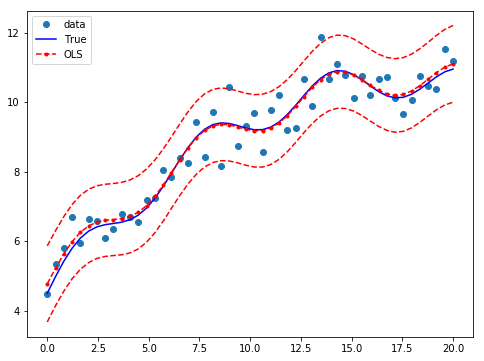

In [11]:
# plot to compare the true relationship to OLS predictions
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');